# Workshop AI - Iniciação científica Senai

### Nesse workshop vamos ter uma breve introdução de machine-learning e deep-learning (ML / DL)

## Links

<a href="https://github.com/fullzer4/WorkshopSenai_IA.git"> - Repositório github</a>

## Dependencias e configurações

### - Verificação do python

In [1]:
!python --version

Python 3.10.9


### - Criação de um ambiente virtual python e ativando ele

In [ ]:
! python -m venv venv

In [30]:
# source venv/Scripts/activate
# pip install jupyterlab
# ipython kernel install --user --name=venv

# reiniciar o jupyter notebook e depois e na parte de Kernel e mudar para venv

SyntaxError: invalid syntax (1696463234.py, line 7)

### - Instalando pacotes com o pip

In [31]:
%pip install -r requirements.txt

     ---------------------------------------- 8.3/8.3 MB 27.9 MB/s eta 0:00:00
  Using cached scipy-1.10.1-cp310-cp310-win_amd64.whl (42.5 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
%matplotlib inline

In [10]:
df = pd.read_csv("FuelConsumption.csv")

# mostrar os 5 primeiros dados da tabela
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


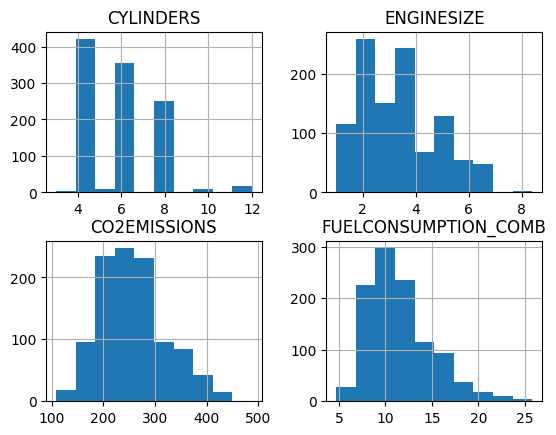

In [12]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

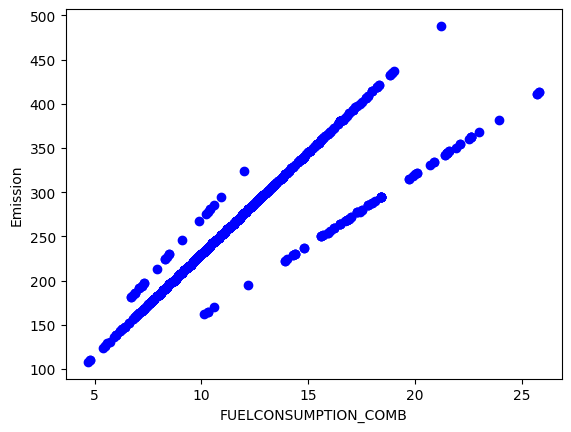

In [13]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

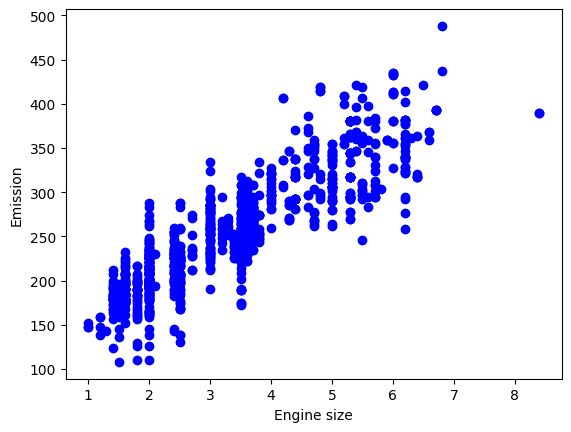

In [14]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

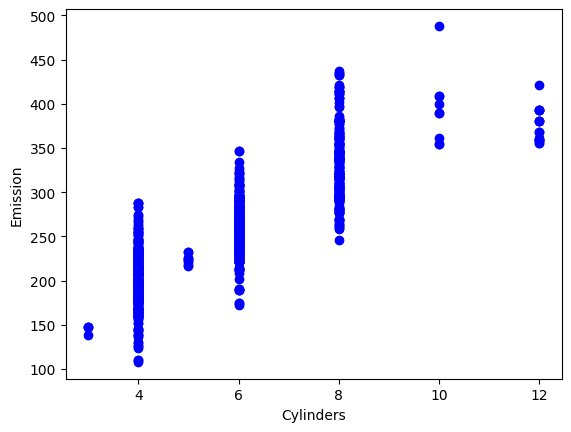

In [16]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [22]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [24]:
print(train)
print(test)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
4            3.5          6                  10.6           244
...          ...        ...                   ...           ...
1061         3.2          6                  11.2           258
1062         3.0          6                  11.8           271
1064         3.0          6                  11.8           271
1065         3.2          6                  11.3           260
1066         3.2          6                  12.8           294

[843 rows x 4 columns]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
12           5.9         12                  15.6           359
20           2.0          4                  10.0           230
21           2.0

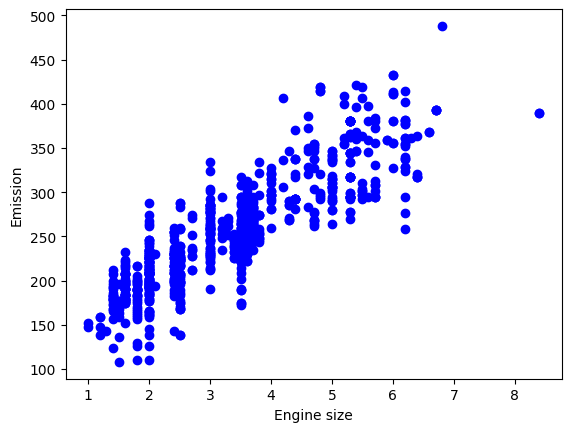

In [25]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [34]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

print ('Coeficiente: ', regr.coef_)
print ('Interceptador: ',regr.intercept_)

Coeficiente:  [[39.05759598]]
Interceptador:  [124.90184434]


Text(0, 0.5, 'Emission')

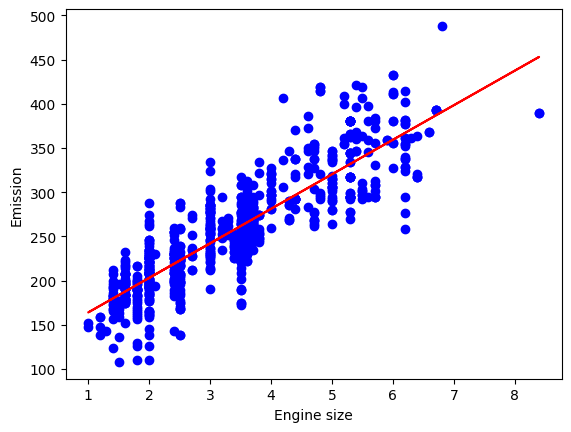

In [35]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [37]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.98
Residual sum of squares (MSE): 927.46
R2-score: 0.79


In [38]:
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

In [39]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

LinearRegression()

In [41]:
predictions = regr.predict(test_x)
predictions

array([[321.0742216 ],
       [229.9904895 ],
       [218.60502298],
       [229.9904895 ],
       [244.62894644],
       [202.34007082],
       [270.6528699 ],
       [244.62894644],
       [355.23062113],
       [356.85711635],
       [304.80926944],
       [285.29132684],
       [269.02637468],
       [273.90586033],
       [234.86997514],
       [234.86997514],
       [335.71267854],
       [376.37505894],
       [208.84605169],
       [176.31614737],
       [176.31614737],
       [234.86997514],
       [210.4725469 ],
       [265.77338425],
       [231.61698471],
       [291.79730771],
       [306.43576465],
       [291.79730771],
       [291.79730771],
       [215.35203255],
       [260.8938986 ],
       [296.67679336],
       [267.39987947],
       [226.73749906],
       [200.71357561],
       [228.36399428],
       [221.85801342],
       [233.24347993],
       [251.13492731],
       [252.76142252],
       [243.00245123],
       [337.33917376],
       [308.06225987],
       [337

In [42]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 21.08
